In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

# So we dont have to use plt.show() every time
%matplotlib inline

In [2]:
IMAGE_SIZE = 256
IMAGE_CHANNELS = 3
EPOCS = 10
BATCH_SIZE = 32

In [3]:
dataset = image_dataset_from_directory(
    directory="dataset",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    labels='inferred',
    shuffle=True,
)

Found 6652 files belonging to 6 classes.


In [4]:
CLASS_NAMES = dataset.class_names
print("Class names:", CLASS_NAMES)
print(len(dataset)*BATCH_SIZE)

Class names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']
6656


Image batch shape: (32, 256, 256, 3)
Label batch as a tensor: tf.Tensor([5 4 1 5 4 5 5 3 3 1 4 3 4 5 3 5 4 1 0 4 4 4 4 0 0 0 4 3 3 3 5 4], shape=(32,), dtype=int32)
Label batch as numpy array: [5 4 1 5 4 5 5 3 3 1 4 3 4 5 3 5 4 1 0 4 4 4 4 0 0 0 4 3 3 3 5 4]
First image in batch raw tensor: tf.Tensor(
[[[ 96.  86.  87.]
  [142. 132. 133.]
  [120. 110. 111.]
  ...
  [100.  91.  96.]
  [ 97.  88.  93.]
  [133. 124. 129.]]

 [[ 95.  85.  86.]
  [ 91.  81.  82.]
  [126. 116. 117.]
  ...
  [113. 104. 109.]
  [ 93.  84.  89.]
  [117. 108. 113.]]

 [[ 87.  77.  78.]
  [109.  99. 100.]
  [113. 103. 104.]
  ...
  [ 85.  76.  81.]
  [139. 130. 135.]
  [110. 101. 106.]]

 ...

 [[163. 158. 164.]
  [172. 167. 173.]
  [190. 185. 191.]
  ...
  [107.  98. 103.]
  [134. 125. 130.]
  [192. 183. 188.]]

 [[139. 134. 140.]
  [180. 175. 181.]
  [164. 159. 165.]
  ...
  [164. 155. 160.]
  [128. 119. 124.]
  [137. 128. 133.]]

 [[135. 130. 136.]
  [179. 174. 180.]
  [165. 160. 166.]
  ...
  [143. 134. 139.]

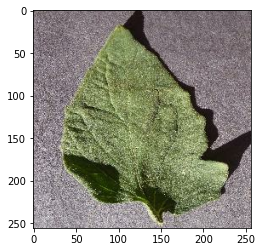

In [5]:
for image_batch, label_batch in dataset.take(1): # First batch
    print("Image batch shape:", image_batch.shape)
    print("Label batch as a tensor:", label_batch)
    print("Label batch as numpy array:", label_batch.numpy())
    print("First image in batch raw tensor:", image_batch[0])
    print("First image visualization:")
    plt.imshow(image_batch[0].numpy().astype(np.uint8))
    break

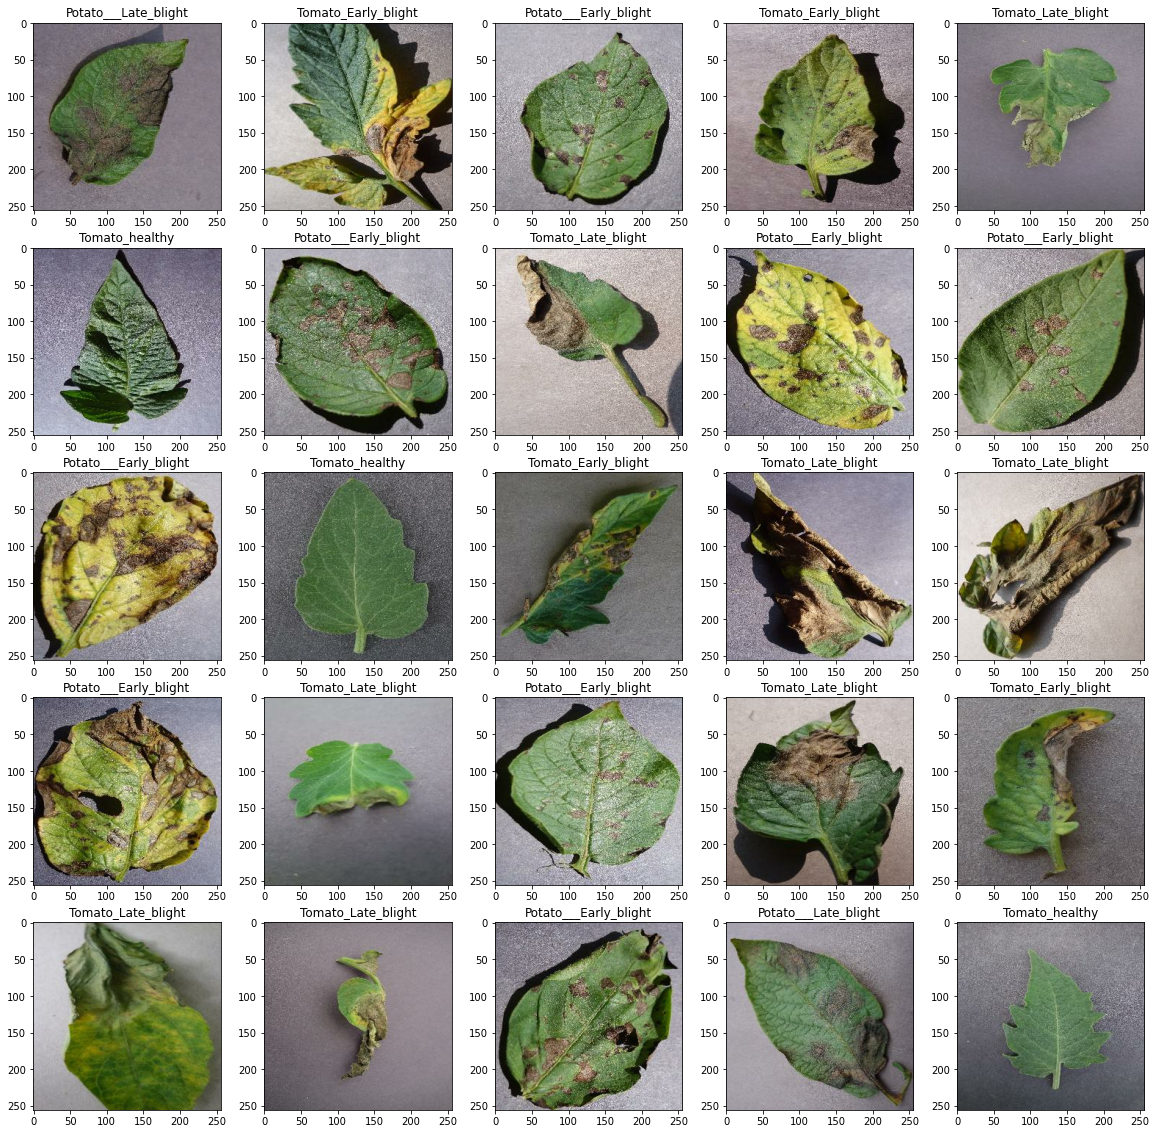

In [6]:

# plotting first 25 images in the batch
plt.figure(figsize=(20, 20))
for image_batch, label_batch in dataset.take(1):
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(image_batch[i].numpy().astype(np.uint8))
        plt.title(CLASS_NAMES[label_batch[i].numpy()])

In [7]:
def get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    """
    Returns a tuple of (train_dataset, val_dataset, test_dataset)
    """
    ds_size = len(dataset)

    # Shuffle the dataset
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=42)
    
    train_take = int(train_split * ds_size)
    val_take = int(val_split * ds_size)
    test_take = int(test_split * ds_size)

    train_dataset = dataset.take(train_take)
    val_dataset = dataset.skip(train_take).take(val_take)
    test_dataset = dataset.skip(train_take + val_take)

    return train_dataset, val_dataset, test_dataset


In [8]:
train_dataset, val_dataset, test_dataset = get_dataset_partitions_tf(dataset)